In [ ]:
!pip install 'qiskit[visualization]'

In [ ]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_bloch_multivector, plot_histogram, array_to_latex

In [ ]:
%matplotlib inline

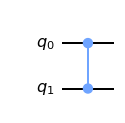

In [ ]:
oracle = QuantumCircuit(2, name='oracle')
oracle.cz(0, 1)
oracle.to_gate()
oracle.draw(output='mpl')

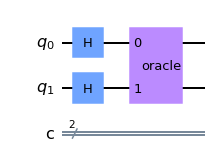

In [ ]:
test_circ = QuantumCircuit(2, 2)
test_circ.h([0, 1])
test_circ.append(oracle, [0, 1])
test_circ.draw(output='mpl')

In [ ]:
sim = Aer.get_backend('statevector_simulator')
res = execute(test_circ, backend=sim).result()

In [ ]:
array_to_latex(res.get_statevector())

<IPython.core.display.Latex object>

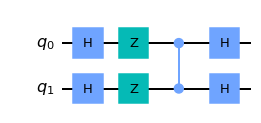

In [ ]:
reflection = QuantumCircuit(2, name='reflection')
reflection.h([0, 1])
reflection.z([0, 1])
reflection.cz(0, 1)
reflection.h([0, 1])
reflection.to_gate()
reflection.draw(output='mpl')

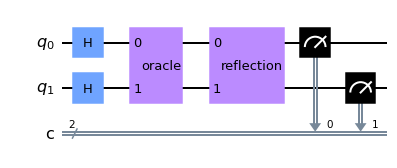

In [ ]:
grover = QuantumCircuit(2, 2)
grover.h([0, 1])
grover.append(oracle, [0, 1])
grover.append(reflection, [0, 1])
grover.measure([0, 1], [0, 1])
grover.draw(output='mpl')

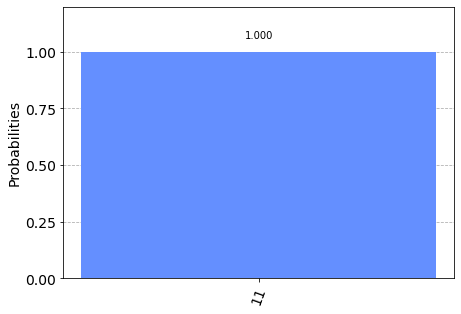

In [ ]:
res = execute(grover, backend=sim).result()
plot_histogram(res.get_counts())

In [ ]:
array_to_latex(res.get_statevector())

<IPython.core.display.Latex object>

In [ ]:
from qiskit import IBMQ
from qiskit.tools.monitor import job_monitor

In [ ]:
IBMQ.save_account('8f7b971b8eeb862e530b7c1086c454c32dfc9891fe0e8456b7d801a503832f4a2a912f03993819d38cb2fc1fd0cb5319b4a1f5760ae2250cc3fade23d4c1f956')

configrc.store_credentials:WARNING:2021-06-17 01:20:38,983: Credentials already present. Set overwrite=True to overwrite.


In [ ]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [ ]:
def runQuantumComputer(qc: QuantumCircuit):
  provider = IBMQ.get_provider('ibm-q')
  backend = provider.get_backend('ibmq_athens')
  job = execute(qc, backend=backend, shots=1)
  job_monitor(job)
  return job.result()

Job Status: job has successfully run


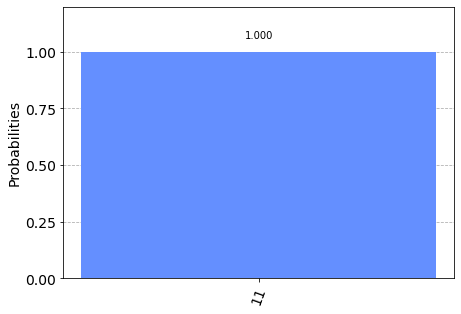

In [ ]:
res = runQuantumComputer(grover).get_counts()
plot_histogram(res)

# Satisfiability Problem

In [ ]:
from qiskit.aqua.algorithms import Grover
from qiskit.aqua.components.oracles import LogicalExpressionOracle

In [ ]:
log_exp = '((Olivia & Abe) | (Jin & Amira)) & ~(Abe & Amira)'
algorithm = Grover(LogicalExpressionOracle(log_exp))

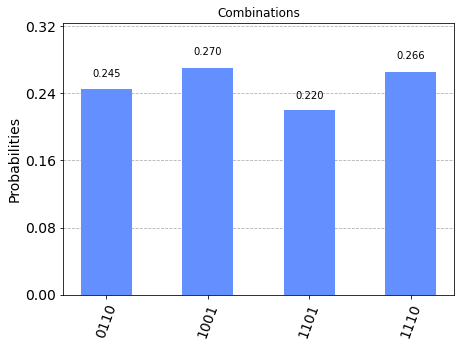

In [ ]:
sim = Aer.get_backend('qasm_simulator')
res = algorithm.run(sim)
plot_histogram(res['measurement'], title='Combinations', bar_labels=True)